In [214]:
import pystatsbomb as sb
import pandas as pd

In [215]:
c = sb.Client()

In [216]:
c.get_competitions()

In [217]:
c.competitions[1]

{'competition_id': 49,
 'competition_name': 'NWSL',
 'country_name': 'United States of America',
 'match_available': '2018-06-11T15:34:54.124942',
 'match_updated': '2018-06-11T15:34:54.124942',
 'season_id': 3,
 'season_name': '2018'}

In [218]:
c.get_matches()

In [219]:
c.matches[1]

{'away_score': 1,
 'away_team': {'away_team_id': 761, 'away_team_name': 'Chicago Red Stars'},
 'competition': {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America'},
 'data_version': '1.0.2',
 'home_score': 1,
 'home_team': {'home_team_id': 766,
  'home_team_name': 'North Carolina Courage'},
 'kick_off': None,
 'last_updated': '2018-06-11T15:34:54.124942',
 'match_date': '2018-05-06',
 'match_id': 7444,
 'match_status': 'available',
 'referee_name': 'M. Vega',
 'season': {'season_id': 3, 'season_name': '2018'},
 'stadium_name': "Sahlen's Stadium at WakeMed Soccer Park"}

In [220]:
c.get_lineups(match_id=7298)

In [221]:
c.lineups[1]

{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 15,
   'player_id': 4635,
   'player_name': 'Julia Spetsmark'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 26,
   'player_id': 4637,
   'player_name': 'Ellie Roebuck'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 12,
   'player_id': 4643,
   'player_name': 'Georgia Stanway'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 8,
   'player_id': 4644,
   'player_name': 'Jill Scott'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 11,
   'player_id': 4645,
   'player_name': 'Isobel Christiansen'},
  {'country': {'id': 201, 'name': 'Scotland'},
   'jersey_number': 22,
   'player_id': 4646,
   'player_name': 'Claire Emslie'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 23,
   'player_id': 4648,
   'player_name': 'Abbie McManus'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 14,
   'player_id': 4649,
  

In [222]:
c.get_events()

In [223]:
events = c.events

In [224]:
len(events)

2960

# To Pandas DataFrames

In [225]:
def getMatchDictChildren(d):
    
    dict_children = {}
    for k,v in d.items():
        if isinstance(v, dict):
            for k, v in v.items():
                dict_children[k] = v
        else:
            dict_children[k] = v
    return dict_children

def getLineupParse(l):
    
    lineup = []
    team_name = l.get('team_name', None)
    team_id = l.get('team_id', None)
    match_id = l.get('match_id', None)
    players = l.get('lineup', 'Structure has changed')
    
    if isinstance(players, list):
        for p in players:
            name = p.get('player_name', None)
            pid = p.get('player_id', None)
            jersey = p.get('jersey_number', None)
            country_id = p.get('country', {'id':None}).get('id', None)
            country_name = p.get('country', {'name':None}).get('name', None)
            
            lineup.append({
                "match_id": match_id,
                "team_name": team_name,
                "team_id": team_id,
                "player_name": name,
                "player_id": pid,
                "jersey_number": jersey,
                "country_id": country_id,
                "country_name": country_name})

            
    else:
        print(players)
    return lineup

# https://stackoverflow.com/questions/6027558/flatten-nested-python-dictionaries-compressing-keys
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [226]:
df_competitions = pd.DataFrame(c.competitions)

In [227]:
df_matches = pd.DataFrame([getMatchDictChildren(match) for match in c.matches])

In [228]:
lineup_list = [getLineupParse(l) for l in c.lineups]
lineup_flat_list = [player for team in lineup_list for player in team]
df_lineups = pd.DataFrame(lineup_flat_list)

In [229]:
df_lineups.head()

,country_id,country_name,jersey_number,match_id,player_id,player_name,team_id,team_name
0,220,Sweden,16,7298,4633,Magdalena Ericsson,745,Chelsea LFC
1,241,United States of America,19,7298,4634,Crystal Dunn,745,Chelsea LFC
2,171,Norway,2,7298,4636,Maria Thorisdottir,745,Chelsea LFC
3,68,England,24,7298,4638,Drew Spence,745,Chelsea LFC
4,171,Norway,18,7298,4639,Maren Mjelde,745,Chelsea LFC


In [230]:
flat_events = [flatten(e) for e in c.events]
ekeys = [list(e.keys()) for e in flat_events]
ekeys_all = [i for s in ekeys for i in s]
set_all_keys = set(ekeys_all)
df_events = pd.DataFrame(flat_events, columns=set_all_keys)

In [231]:
df_events.head()

,substitution_replacement_name,pass_recipient_name,pass_shot_assist,index,tactics_formation,shot_follows_dribble,bad_behaviour_card_name,related_events,shot_technique_id,match_id,...,possession,shot_freeze_frame,pass_outcome_name,position_name,shot_technique_name,location,pass_end_location,pass_length,duel_type_id,shot_outcome_name
0,NaN,NaN,NaN,1,433.0,NaN,NaN,NaN,NaN,7298,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2,352.0,NaN,NaN,NaN,NaN,7298,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3,NaN,NaN,NaN,[c007670e-f679-4f80-b901-b704130fee05],NaN,7298,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4,NaN,NaN,NaN,[7fe92118-5965-4033-9b59-29b3947a3d8a],NaN,7298,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Ramona Bachmann,NaN,5,NaN,NaN,NaN,[dddef0cb-75ef-4e0e-8f45-e8b7dd9e2c7d],NaN,7298,...,2,NaN,NaN,Center Midfield,NaN,"[61.0, 40.0]","[63.0, 37.0]",3.605551,NaN,NaN


# All at Once

In [1]:
import pystatsbomb as sb
import pandas as pd

In [2]:
c = sb.Client(source=None)

In [3]:
c.get_all_sb_data(toPandas=True)

In [4]:
c.df_events.shape

(27210, 116)

# Events

In [6]:
c.df_events['type_name'].value_counts()

Pass                 9572
Ball Receipt*        8249
Pressure             3254
Ball Recovery        1415
Duel                  531
Block                 517
Clearance             406
Dribble               405
Goal Keeper           394
Miscontrol            337
Shot                  325
Dribbled Past         277
Interception          251
Camera On             244
Dispossessed          230
Foul Committed        221
Foul Won              215
Camera off             65
Substitution           60
Half End               44
Half Start             44
Injury Stoppage        32
50/50                  30
Starting XI            22
Shield                 17
Tactical Shift         13
Offside                10
Player Off              7
Player On               7
Error                   6
Bad Behaviour           4
Referee Ball-Drop       2
Own Goal Against        2
Own Goal For            2
Name: type_name, dtype: int64

In [234]:
set_all_keys

{'bad_behaviour_card_id',
 'bad_behaviour_card_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'dribble_nutmeg',
 'dribble_outcome_id',
 'dribble_outcome_name',
 'dribble_overrun',
 'duel_outcome_id',
 'duel_outcome_name',
 'duel_type_id',
 'duel_type_name',
 'duration',
 'foul_committed_advantage',
 'foul_committed_offensive',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part_id',
 'goalkeeper_body_part_name',
 'goalkeeper_outcome_id',
 'goalkeeper_outcome_name',
 'goalkeeper_position_id',
 'goalkeeper_position_name',
 'goalkeeper_technique_id',
 'goalkeeper_technique_name',
 'goalkeeper_type_id',
 'goalkeeper_type_name',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome_id',
 'interception_outcome_name',
 'location',
 'match_id',
 'minute',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_backheel',
 'pass_body_part_id',
 'pass

## Passes

In [235]:
pass_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name',
    'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Pass details
    'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_backheel', 
    'pass_body_part_id', 'pass_body_part_name', 'pass_cross', 'pass_deflected', 
    'pass_end_location', 'pass_goal_assist', 'pass_height_id', 'pass_height_name', 
    'pass_length', 'pass_outcome_id', 'pass_outcome_name', 'pass_recipient_id', 
    'pass_recipient_name', 'pass_shot_assist', 'pass_switch', 'pass_through_ball',
    'pass_type_id', 'pass_type_name']

In [236]:
df_passes = df_events.loc[df_events['type_name'].isin(['Pass']), pass_values]

In [237]:
df_passes['pass_outcome_name'].value_counts()

Incomplete      216
Out              23
Pass Offside      4
Unknown           3
Name: pass_outcome_name, dtype: int64

In [238]:
df_passes.under_pressure.value_counts()

True    214
Name: under_pressure, dtype: int64

### Question: Does pressure affect completion percentage?

In [239]:
no_pressure =  df_passes.loc[df_passes['under_pressure'].isnull(), 'pass_outcome_name']# &
no_pressure = no_pressure.isnull()
yes_pressure = df_passes.loc[df_passes['under_pressure'].notnull(), 'pass_outcome_name']
yes_pressure = yes_pressure.isnull()

In [240]:
pd.crosstab(df_passes['pass_outcome_name'].isnull(), df_passes['under_pressure'] == True,  margins=True)

under_pressure,False,True,All
pass_outcome_name,,,
False,198,48,246
True,588,166,754
All,786,214,1000


In [241]:
import scipy.stats
# pressure seems not to have a statistically significant difference on pass completion (simple)
scipy.stats.ttest_ind(yes_pressure, no_pressure, equal_var=False)

Ttest_indResult(statistic=0.84925094125321177, pvalue=0.39632478513121183)

# Shots

In [244]:
shot_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name', 'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Shot details
    'shot_body_part_id', 'shot_body_part_name', 'shot_end_location',
    'shot_first_time', 'shot_follows_dribble', 'shot_freeze_frame',
    'shot_key_pass_id', 'shot_outcome_id', 'shot_outcome_name', 
    'shot_statsbomb_xg', 'shot_technique_id', 'shot_technique_name',
    'shot_type_id', 'shot_type_name',
]

In [245]:
df_shots = df_events.loc[df_events['type_name'].isin(['Shot']), shot_values]

In [248]:
df_shots['shot_outcome_name'].value_counts()

Blocked    12
Off T       9
Saved       8
Goal        4
Wayward     1
Name: shot_outcome_name, dtype: int64

# Plotting

# Plotting

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

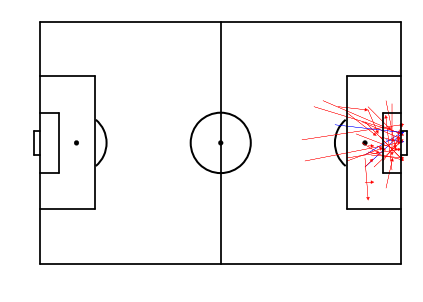

In [257]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([18,18],[62,18],color="black")
plt.plot([0,18],[62,62],color="black")
plt.plot([18,0],[18,18],color="black")

#Right Penalty Area
plt.plot([120,102],[62,62],color="black")
plt.plot([102,102],[62,18],color="black")
plt.plot([102,120],[18,18],color="black")

#Left 6-yard Box
plt.plot([0,6],[50,50],color="black")
plt.plot([6,6],[50,30],color="black")
plt.plot([6,0],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114],[50,50],color="black")
plt.plot([114,114],[50,30],color="black")
plt.plot([114,120],[30,30],color="black")

# Left Goal
plt.plot([0,-2],[44,44],color="black")
plt.plot([-2,-2],[44,36],color="black")
plt.plot([-2,0],[36,36],color="black")

# Right Goal
plt.plot([120,122],[44,44],color="black")
plt.plot([122,122],[44,36],color="black")
plt.plot([122,120],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),10,color="black",fill=False, lw=2)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((12,40),0.8,color="black")
rightPenSpot = plt.Circle((108,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=20,width=20,angle=0,theta1=310,theta2=50,color="black",lw=2)
rightArc = Arc((108,40),height=20,width=20,angle=0,theta1=130,theta2=230,color="black",lw=2)

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

# Pass map
#for line in df_passes[['location', 'pass_end_location', 'pass_outcome_name']].iterrows():
#    x,y,dx,dy,c = getArrow(line[1][0], line[1][1], line[1][2], 'None')
#    ax.arrow(x, y, dx, dy, head_width=1, head_length=1, fc=c, ec=c)

# Shot map
for shot in df_shots[['location', 'shot_end_location', 'shot_outcome_name']].iterrows():
    x,y,dx,dy,c = getArrow(shot[1][0], shot[1][1], shot[1][2], 'Goal')
    ax.arrow(x, y, dx, dy, head_width=1, head_length=1, fc=c, ec=c)    
    
#sns.regplot(df_shot["x"],df_shot["y"], fit_reg=False)#, shade=True,n_levels=50)
#team1 = df_shot[df_shot.team == 'Chelsea LFC']
#team2 = df_shot[df_shot.team != 'Chelsea LFC']

#sns.kdeplot(team1["x"], team1["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Reds", ax=ax)
#sns.kdeplot(team2["x"], team2["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Blues", ax=ax)
#sns.regplot(team1["x"], team1["y"], fit_reg=False, color="red", ax=ax)
#sns.regplot(team2["x"], team2["y"], fit_reg=False, color="blue", ax=ax)

plt.ylim(-5, 85)
plt.xlim(-5, 125)


#Display Pitch
plt.show()

In [256]:
import numpy as np
def getArrow(start, end, color, qualifier=None):
    x = start[0]
    y = start[1]
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    if color == qualifier:
        color = 'b'
    else:
        color = 'r'
    return x, y, dx, dy, color

In [164]:
df_passes[['location', 'pass_end_location', 'pass_outcome_name']].head()

,location,pass_end_location,pass_outcome_name
4,"[61.0, 40.0]","[63.0, 37.0]",NaN
7,"[69.0, 33.0]","[84.0, 5.0]",NaN
12,"[6.0, 43.0]","[59.0, 69.0]",Incomplete
14,"[62.0, 12.0]","[80.0, 10.0]",Incomplete
17,"[41.0, 71.0]","[43.0, 73.0]",Incomplete


In [254]:
for shot in df_shots[['location', 'shot_end_location', 'shot_outcome_name']].iterrows():
    x,y,dx,dy,c = getArrow(shot[1][0], shot[1][1], shot[1][2])
    print(x,y,dx,dy)

115.0 25.0 2.0 9.0
109.0 51.0 3.0 -7.0
99.0 52.0 9.0 -1.0
107.0 40.0 5.0 -3.0
108.0 32.0 12.0 10.899999999999999
108.0 32.0 2.0 2.0
87.0 41.0 33.0 5.0
108.0 36.0 12.0 7.299999999999997
105.0 43.0 13.0 -5.0
117.0 53.0 0.0 -16.1
102.0 50.0 9.0 -7.0
112.0 39.0 2.0 -1.0
115.0 54.0 3.0 -14.899999999999999
102.0 34.0 11.0 4.0
108.0 47.0 12.0 -12.100000000000001
94.0 54.0 26.0 -11.100000000000001
108.0 27.0 2.0 0.0
114.0 34.0 5.0 6.700000000000003
115.0 41.0 5.0 -0.5
109.0 39.0 1.0 0.0
117.0 31.0 -2.0 17.200000000000003
91.0 52.0 28.0 -8.5
118.0 39.0 2.0 6.5
108.0 35.0 1.0 -13.0
111.0 32.0 9.0 8.5
88.0 34.0 31.0 6.0
113.0 42.0 7.0 -7.100000000000001
107.0 47.0 12.0 -5.200000000000003
110.0 36.0 10.0 -0.8999999999999986
98.0 46.0 22.0 -2.5
113.0 42.0 4.0 -1.0
109.0 52.0 7.0 -7.0
102.0 35.0 17.0 2.799999999999997
109.0 37.0 11.0 -2.5


In [253]:
df_shots[['location', 'shot_end_location', 'shot_outcome_name']]

,location,shot_end_location,shot_outcome_name
33,"[115.0, 25.0]","[117.0, 34.0]",Blocked
186,"[109.0, 51.0]","[112.0, 44.0]",Blocked
192,"[99.0, 52.0]","[108.0, 51.0]",Blocked
196,"[107.0, 40.0]","[112.0, 37.0]",Blocked
204,"[108.0, 32.0]","[120.0, 42.9, 1.9]",Goal
583,"[108.0, 32.0]","[110.0, 34.0]",Blocked
695,"[87.0, 41.0]","[120.0, 46.0, 2.5]",Off T
749,"[108.0, 36.0]","[120.0, 43.3, 1.0]",Goal
765,"[105.0, 43.0]","[118.0, 38.0, 1.2]",Saved
832,"[117.0, 53.0]","[117.0, 36.9, 1.2]",Saved
